In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Monte Carlo Method

In the Exact Method we show what everyone for hundreds of years tried to do but without computers. In order to motivate the Monte Carlo Method we ask the following question, what if we could not reduce the following:

$P(\theta|\alpha=10, \beta=10, a=140, b=110) \propto \binom{250}{140}\theta^{140}(1-\theta)^{110} * Beta( 10, 10)$

into something as nice as:

$Beta( a + \alpha, b + \beta)$?

For a very long time--centuries--this not so inconsequential problem held back Bayesian inference from practical use. Before we tackle the Monte Carlo method of Bayesian inference, let's look at Monte Carlo methods in general.

## Monte Carlo Simulation

A large number of techniques go under the name of "Monte Carlo" but they basically have one thing in common: they use a kind of random exploration as the basis for some computation. One the simplest and interesting examples of the Monte Carlo approach is to use it to estimate the value of $\pi$.

Imagine we have a unit square that enclose a unit circle and we throw darts randomly at this square. If $r$ is 1/2 the width of the square (and equal to the radius of the circle) then the area of the square is $4r^2$ and the area of the circle is $\pi r^2$. The ratio of these is:

$$\frac{\pi r^2}{4r^2} = \frac{\pi}{4}$$

This means that if you pick points at random in the square, approximately $\frac{\pi}{4}$ of them should fall in the circle. If you then multiply the ratio of the points that fall inside the circle to those in the square by 4, you should have an estimate of $\pi$:

In [3]:
from random import uniform

def estimate_pi( throws):
    hits = 0.0
    inside = []
    outside = []
    for i in range( 0, throws):
        x, y = uniform(-1, 1), uniform(-1,1)
        if (x**2 + y**2) <= 1:
            hits += 1.0
            inside.append((x, y))
        else:
            outside.append((x, y))
    return 4 * (hits / throws), inside, outside

In [4]:
pi, inside, outside = estimate_pi( 10)
print( "pi=", pi)
print( "inside throws=", len( inside))
print( "outside throws=", len( outside))

pi= 2.8
inside throws= 7
outside throws= 3


so in just 10 throws, we have an estimate of pi from the number of throws inside and outside the circle.

We can plot this and show what's happening graphically. Points that land inside the circle will be red and points that land outside the circle will be green.

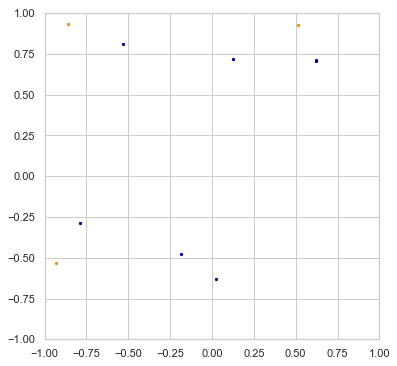

In [5]:
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkBlue")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkOrange")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

plt.show()
plt.close()

Now with 100 throws:

3.28


(-1, 1)

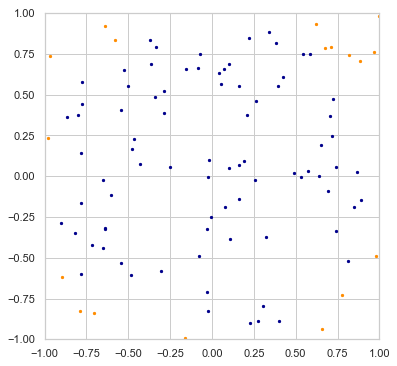

In [6]:
pi, inside, outside = estimate_pi( 100)
print( pi)
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkBlue")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkOrange")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

A 1000 throws?

3.084


(-1, 1)

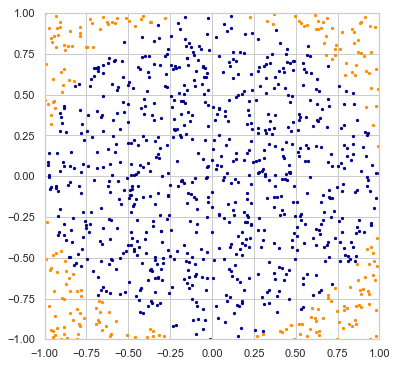

In [7]:
pi, inside, outside = estimate_pi( 1000)
print( pi)
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkBlue")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkOrange")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

10,000 throws...

3.1652


(-1, 1)

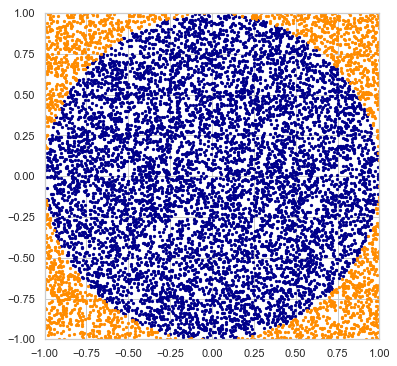

In [8]:
pi, inside, outside = estimate_pi( 10000)
print( pi)
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkBlue")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkOrange")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

We can do something similar if we can specify the form of the posterior distribution. This is also often done using a likelihood and its conjugate distribution. As we saw previously, the posterior distribution for the current problem has the following form:

$Beta( a + \alpha, b + \beta)$

Given our values for $a$, $\alpha$, $b$ and $\beta$, we can parameterize the posterior distribution directly and sample from it.

mean 0.5559997640362395


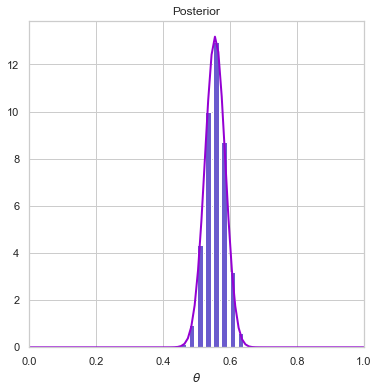

In [9]:
from numpy.random import beta as beta_dist

samples = 10000

alpha = 10.0
beta = 10.0
a = 140
b = 110

sample_thetas = beta_dist( a + alpha, b + beta, samples)
print( "mean", np.mean( sample_thetas))

ys, bins = np.histogram( sample_thetas, bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)
axes.bar( center, ys, align='center', width=width, color="slateblue")
xs = np.linspace( 0, 1, 100)
axes.plot( xs, [stats.beta.pdf( x, 140+10, 110+10) for x in xs], color="darkviolet", lw=2)

axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta$")
axes.set_title( "Posterior")

plt.show()
plt.close()

where the bright orchid line is the result of the Exact method.

The great thing about this approach is that it is very easy to ask and answer questions. Each instance in the `samples` variable is one simulation of flipping a coin that is consistent with the parameters we've specified. This makes it very easy to answer questions like, what is the probability that $\theta$ is between $[0.45, 0.55]$?

In [10]:
print( np.mean((0.45 <= sample_thetas) & (sample_thetas <= 0.55)))

0.4189


because you're just counting all the occurrences of the event in the samples.

For more complicated cases, we would actually need to do Markov Chain Monte Carlo Simulations.

## Markov Chain Monte Carlo Simulation

Markov Chain Monte Carlo (MCMC) Simulation is a bit more complicated that vanilla Monte Carlo estimation. Imagine taking the prior and sampling a value of $\theta$ from it at random and then using that $\theta$ to parameterize a likelihood function and sampling 250 trials from it. Do this thousands of times and you have the data necessary to compute the posterior distribution. The technique is immensely powerful, even beyond statistical inference to a very general view of Bayesian modeling. However, it requires an additional library and is a bit beyond the scope of this text. Still it's something worth looking at at another point.

If you thought Monte Carlo methods were magic, wait until you see The Bootstrap...